# DEEP LEARNING

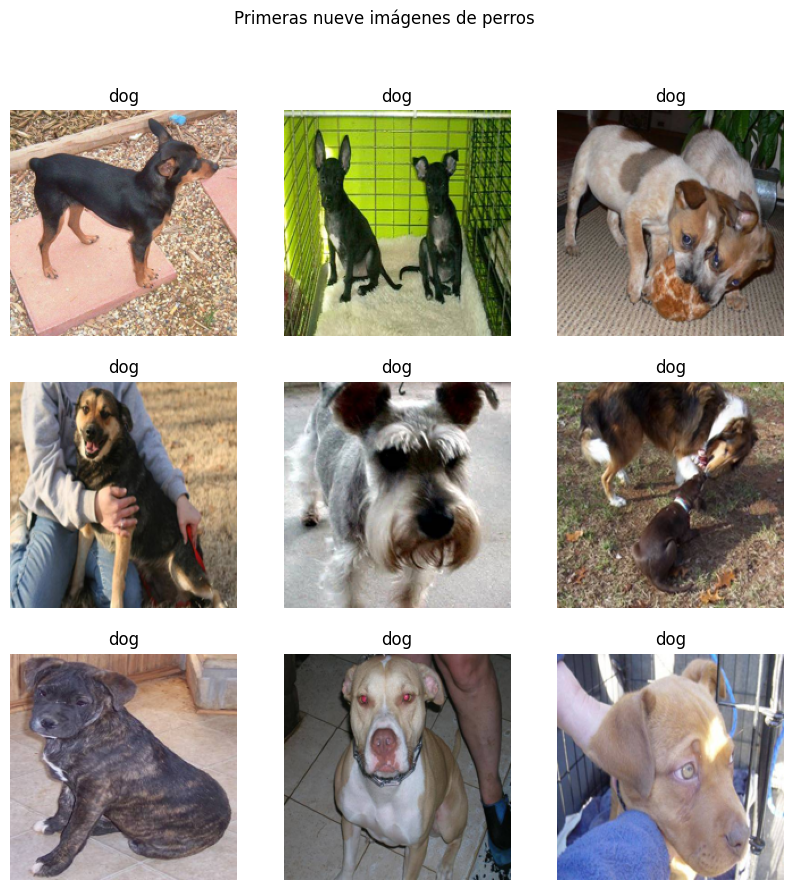

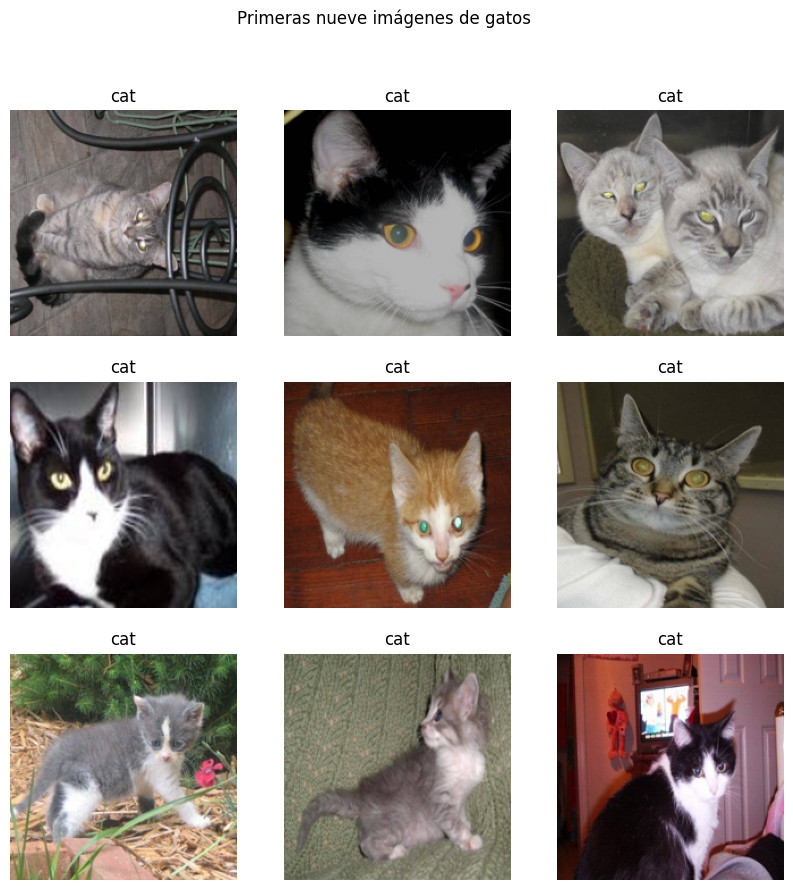

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def load_and_resize_images(directory, label, num_images=9, target_size=(200, 200)):
    images = []
    labels = []
    count = 0
    for filename in os.listdir(directory):
        if count >= num_images:
            break
        if filename.startswith(label):
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).resize(target_size)
            images.append(np.array(img))
            labels.append(label)
            count += 1
    return images, labels

train_dir = '/workspaces/DEEP_LEARNING_/data/raw/train'  

dog_images, dog_labels = load_and_resize_images(train_dir, 'dog', num_images=9)
cat_images, cat_labels = load_and_resize_images(train_dir, 'cat', num_images=9)

def plot_images(images, labels, title):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_images(dog_images, dog_labels, 'Primeras nueve imágenes de perros')
plot_images(cat_images, cat_labels, 'Primeras nueve imágenes de gatos')


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

def load_and_resize_images(directory, target_size=(200, 200)):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith('.jpg'):
            label = 1 if 'dog' in filename else 0
            img_path = os.path.join(directory, filename)
            img = Image.open(img_path).resize(target_size)
            images.append(np.array(img))
            labels.append(label)
    return np.array(images), np.array(labels)

train_dir = '/workspaces/DEEP_LEARNING_/data/raw/train'  

X, y = load_and_resize_images(train_dir)

X = X / 255.0

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)



: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Crear un generador de datos de validación sin aumento de datos
val_datagen = ImageDataGenerator(rescale=1./255)

# Crear generadores de datos
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)
val_generator = val_datagen.flow(X_val, y_val, batch_size=32)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Construir la red neuronal
model = Sequential()

model.add(Conv2D(input_shape=(200, 200, 3), filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=4096, activation="relu"))
model.add(Dense(units=1, activation="sigmoid"))  # Cambiado a sigmoid para una salida binaria

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(X_train) // 32,
    validation_data=val_generator,
    validation_steps=len(X_val) // 32,
    epochs=50,
    callbacks=[checkpoint, early_stopping]
)


In [ ]:
from tensorflow.keras.models import load_model

best_model = load_model('best_model.h5')

val_loss, val_accuracy = best_model.evaluate(val_generator, steps=len(X_val) // 32)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy}')
